In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing dataset
1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading the data, we'll check all the information in the dataset to get to know all the hidden information in the data like null values, datatypes od columns and related stuff.
3. Null values in the dataset are checked, and if there are null values in the dataset,following methods can be done depending on what's more feasible for the data originality to be maintained. 
    A. Imputing data using Imputation method in sklearn 
    B. Filling NaN values with mean, median or mode using fillna() method.
4. We'll then describe data which will help us wit statistical analysis.

In [2]:
car=pd.read_csv('car1.csv')

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
cols=['Car_Name','Year','Fuel_Type','Seller_Type','Transmission','Owner']
for col in cols:
    print(col,': ',car[col].unique())

Car_Name :  ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 

In [6]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car=car.drop('Car_Name',axis=1)

## Feature Engineering
1. Using 'Years_old' feature to create a feature which gives number of years car has been driven.
2. Getting dummy variables of columns 'Owner','Fuel_Type','Seller_Type','Trasmission'

In [8]:
car['Years_Old']=2021-car['Year']
car.drop('Year',inplace=True,axis=1)

In [9]:
car.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
car=pd.get_dummies(car,drop_first=True)

In [11]:
car.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [12]:
car['Owner']=car['Owner'].mask(car['Owner']==3,2)

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Years_Old               301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [14]:
car.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.039867,7.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.212302,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,9.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,2.000000,18.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection
#### Selecting features which play a significant role in influencing value of car by:
1. Evaluating correlation between independent and dependent variables.
2. Using feature_importances_ attribute of ExtraTreeRegressor() object.

<AxesSubplot:>

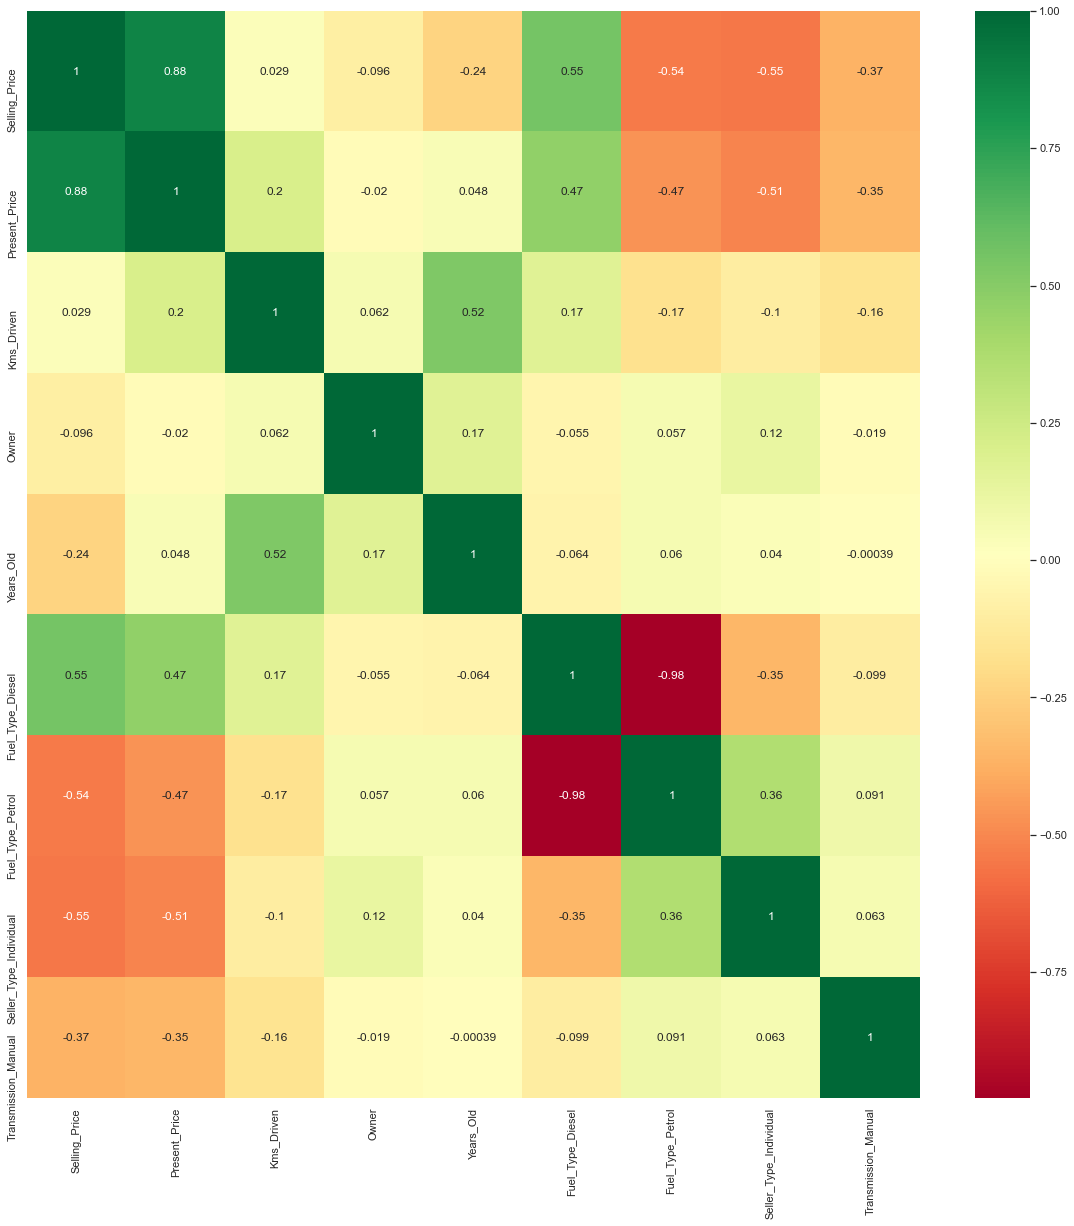

In [15]:
cormat=car.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cormat,annot=True,cmap="RdYlGn")

In [16]:
corr=car.corr()['Selling_Price'].abs().sort_values(ascending=False)
corr=corr[corr>0.3]
corr

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Seller_Type_Individual    0.550724
Fuel_Type_Petrol          0.540571
Transmission_Manual       0.367128
Name: Selling_Price, dtype: float64

In [17]:
X=car.iloc[:,1:]
y=car.iloc[:,0]

In [18]:
X.head()

,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.3858275  0.04204345 0.00082009 0.07687738 0.21944724 0.01147436
 0.13512699 0.12838298]


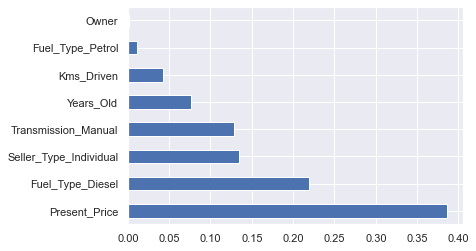

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

#### As 'Owner' and 'Kms_Driven' variables are very less correlated with the dependent variable, they can be ignored from predictive modeling.

#### Also 'Fuel_Type_Petrol' and 'Fuel_Type_Diesel' variables are highly correlated with each other with correlation of 0.98, which shows that they are almost collinear with each other. So we can drop either of them as well to reduce computational expense. 

In [23]:
car.drop(['Owner','Kms_Driven','Fuel_Type_Petrol'],axis=1,inplace=True)
X=car.iloc[:,1:]
y=car.iloc[:,0]
X.head()

,Present_Price,Years_Old,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,5.59,7,0,0,1
1,9.54,8,1,0,1
2,9.85,4,0,0,1
3,4.15,10,0,0,1
4,6.87,7,1,0,1


# Fitting model using Random Forest
1. Splitting data in train and test sets to make model predictions.
2. Importing model.
3. Fitting data in model.
4. Making predictions on X_test.
5. Finding RMSE score.
6. Plotting graph of predicted and actual values.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred = rf.predict(X_test)

In [27]:
rf.score(X_train,y_train)

0.9854033275084458

In [28]:
rf.score(X_test,y_pred)

1.0

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


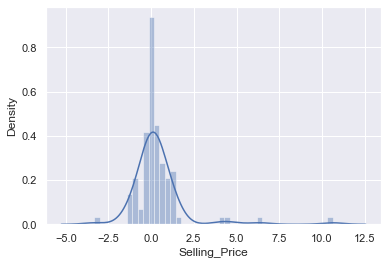

In [29]:
sns.distplot(y_test-y_pred)
plt.show()

In [30]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

print('Mean Absolute Error: ',mae)
print('Mean Squared Error: ',mse)
print('Root Mean Squared Error: ',rmse)

Mean Absolute Error:  0.7862795735217166
Mean Squared Error:  2.6407507081503403
Root Mean Squared Error:  1.6250386789705469


## Hyperparameter Tuning using RandomSearchCV
1. We assign hyperparameters in form of dictionary.
2. Then we fit the model.
3. We check the best parameters for fitted model.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [32]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
# Random search of parameters, using 3 fold cross validation, 
# search across 30 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 3, 
                               verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_esti

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [34]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [35]:
rf_random.best_score_

-3.7917495219434194

In [36]:
predictions=rf_random.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

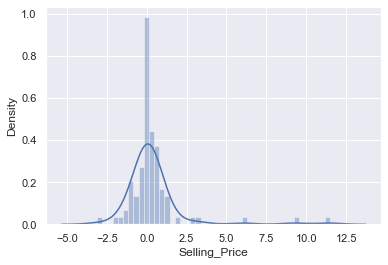

In [37]:
sns.distplot(y_test-predictions)

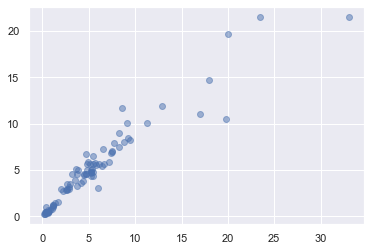

In [38]:
plt.scatter(y_test,predictions,alpha=0.5)

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8488796306907354
MSE: 3.516618779684947
RMSE: 1.8752649891908468


## Saving model to reuse

In [40]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [41]:
model = open('random_forest_regression_model.pkl','rb')
forest = pickle.load(model)

In [42]:
y_prediction = forest.predict(X_test)

In [43]:
metrics.r2_score(y_test, y_prediction)

0.8824111512257884